# <center>Python Data Visualization<center>
## <center>Second Sub-Goal: Job Scheduling & Resource Allocation Optimization<center>
______________________________________________________________________________
**<center>Name:<center>**
## <center>Ali Mir<center>

**<center>GitHub:<center>** **<center>https://github.com/Alii-Mir<center>**
______________________________________________________________________________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)
import datetime

In [ ]:
df_calend = pd.read_csv('../data/calendar.csv', parse_dates=['date'])
df_employ = pd.read_csv('../data/employees.csv')
df_land = pd.read_csv('../data/landscaping.csv', parse_dates=['request_date', 'start_date', 'completion_date'])


___
A small analysis to see that weekdays are mostly the days having a few number of busy employees working. (This part can be ignored.)

In [3]:
df_calend['busy_employees'] = df_calend.count(axis=1) - 1
df_calend['unique_jobs'] = df_calend.nunique(axis=1) - 2
df_calend['free_employees'] = df_calend.isnull().sum(axis=1)
# 0 (Monday) to 6 (Sunday)
df_calend['day'] = df_calend.date.dt.dayofweek
df_calend.head(2)

,date,e_1ce84,e_605182,e_45650a,e_807348,e_5bfce2,e_36df83,e_763bb6,e_35ca7,e_95ec35,...,e_8e4e3c,e_5813bb,e_1a92ef,e_8f7f11,e_3b55a0,e_2d439,busy_employees,unique_jobs,free_employees,day
0,2022-04-01,j_74e2cb,j_1eb7d,j_105361,j_74e2cb,j_4f7eed,j_448c83,j_1f8493,j_3b61ab,j_14692d,...,j_56071c,j_89654b,j_602beb,j_47dd5,j_56071c,j_4f7eed,24,17,0,4
1,2022-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j_448c83,...,j_1f8493,j_74e2cb,j_602beb,j_47dd5,j_4f7eed,j_4f7eed,16,10,8,5


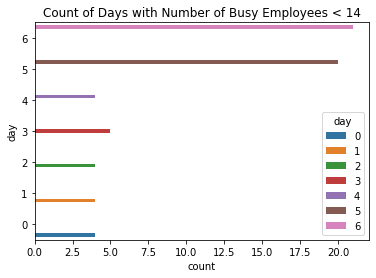

In [4]:
df_calend_14 = df_calend.copy()
df_calend_14 = df_calend_14[df_calend_14.busy_employees <= 14]

fig, ax2 = plt.subplots() #figsize=(10, 5), dpi=150
# order=day_order
sns.countplot(y = 'day', data = df_calend_14, orient = "h", hue = 'day', ax=ax2)
ax2.set(title="Count of Days with Number of Busy Employees < 14")

ax2.invert_yaxis()
plt.show()

___

A function for our Visualization 3. It calculates the number of waiting dates.

In [5]:
def df_dates_waiting(df_lnd):
    df_calend_waiting = df_calend.copy()
    df_calend_waiting["waiting_list"] = 0
    df_calend_waiting = df_calend_waiting[["date", "waiting_list"]]
    
    for i, whole_row in df_lnd.iterrows():
        request_date = whole_row['request_date']
        start_date = whole_row['start_date']
        date_mask = (df_calend_waiting['date'] >= request_date) & (df_calend_waiting['date'] < start_date)
        df_calend_waiting.loc[date_mask, 'waiting_list'] += 1
        
    return df_calend_waiting

## Visualization 3: Interactive, Explanatory, Somewhat Exploratory, Derived Data

In [6]:
# %matplotlib notebook
# %matplotlib inline
actual_j_types = df_land["job_type"].unique().tolist()
actual_j_all = ['all'] + actual_j_types
fancy_j_types = [name.replace('_', ' ').title() for name in actual_j_all]
jtypes_dict = dict(zip(fancy_j_types, actual_j_all))
#----------------------------------------------------------------------------------------------
@interact(j_type = widgets.Dropdown(options=fancy_j_types, value="All", description="Job Type:"))
def f3(j_type):
    
    j_legend = j_type
    j_type = jtypes_dict[j_type]
    df_date_all = df_dates_waiting(df_land)
    
    if j_type == "all":
        df_land_j = df_land
    else:
        df_land_j = df_land[df_land.job_type == j_type]
    #----------------------------------------------------------------------
    fig, ax3 = plt.subplots(figsize=(6.5, 4.5), dpi=200) #dpi=150, figsize=(8, 6), dpi=1000
    
    # gray
    sns.lineplot(x = 'date', y = 'waiting_list', data = df_date_all, ax=ax3, ci=None, color="gray")
    for j in actual_j_types:
        df = df_dates_waiting(df_land[df_land.job_type == j])
        sns.lineplot(x = 'date', y = 'waiting_list', data = df, ax=ax3, ci=None, color="gray")
    #----------------------------------------------------------------------    
    # bold
    df = df_dates_waiting(df_land_j)
    label = rf"Job Type: $\bf{{{j_legend.replace(' ', '~')}}}$"
    sns.lineplot(x = 'date', y = 'waiting_list', data = df, ax=ax3, ci=None, color="blue", label=label)
    #----------------------------------------------------------------------
    dates = df_date_all["date"]
    ax3.set(ylim=(0, 250), xlim=(dates.min(), dates.max()))
    months = df_date_all["date"].dt.strftime('%b').unique()
    xticks = ax3.get_xticks(); ax3.set_xticks(xticks, months)
    
    ax3.grid(which='major', linestyle='-', linewidth='0.1', color='black')
    ax3.set_yticks(np.arange(0, 251, 10), minor=True)
    ax3.grid(which='minor', linestyle='-', linewidth='0.1', color='gray')
    ax3.set_title("Number of Waiting Jobs in Each Day (Year 2022)", pad=10, fontsize=10)
    ax3.set_xlabel("Date (Labels are months)", labelpad=10); ax3.set_ylabel("Number of Waiting Jobs", labelpad=10)
    legend = ax3.legend(loc='upper right', fontsize='small', framealpha=0.2)
    
    fig.tight_layout()
    # plt.savefig('3_line.png', facecolor='w', dpi=1000)
    plt.show()

interactive(children=(Dropdown(description='Job Type:', options=('All', 'Basic Lawncare', 'Garden Landscaping'…

## Visualization 4: Explanatory, Somewhat Exploratory, Derived Data

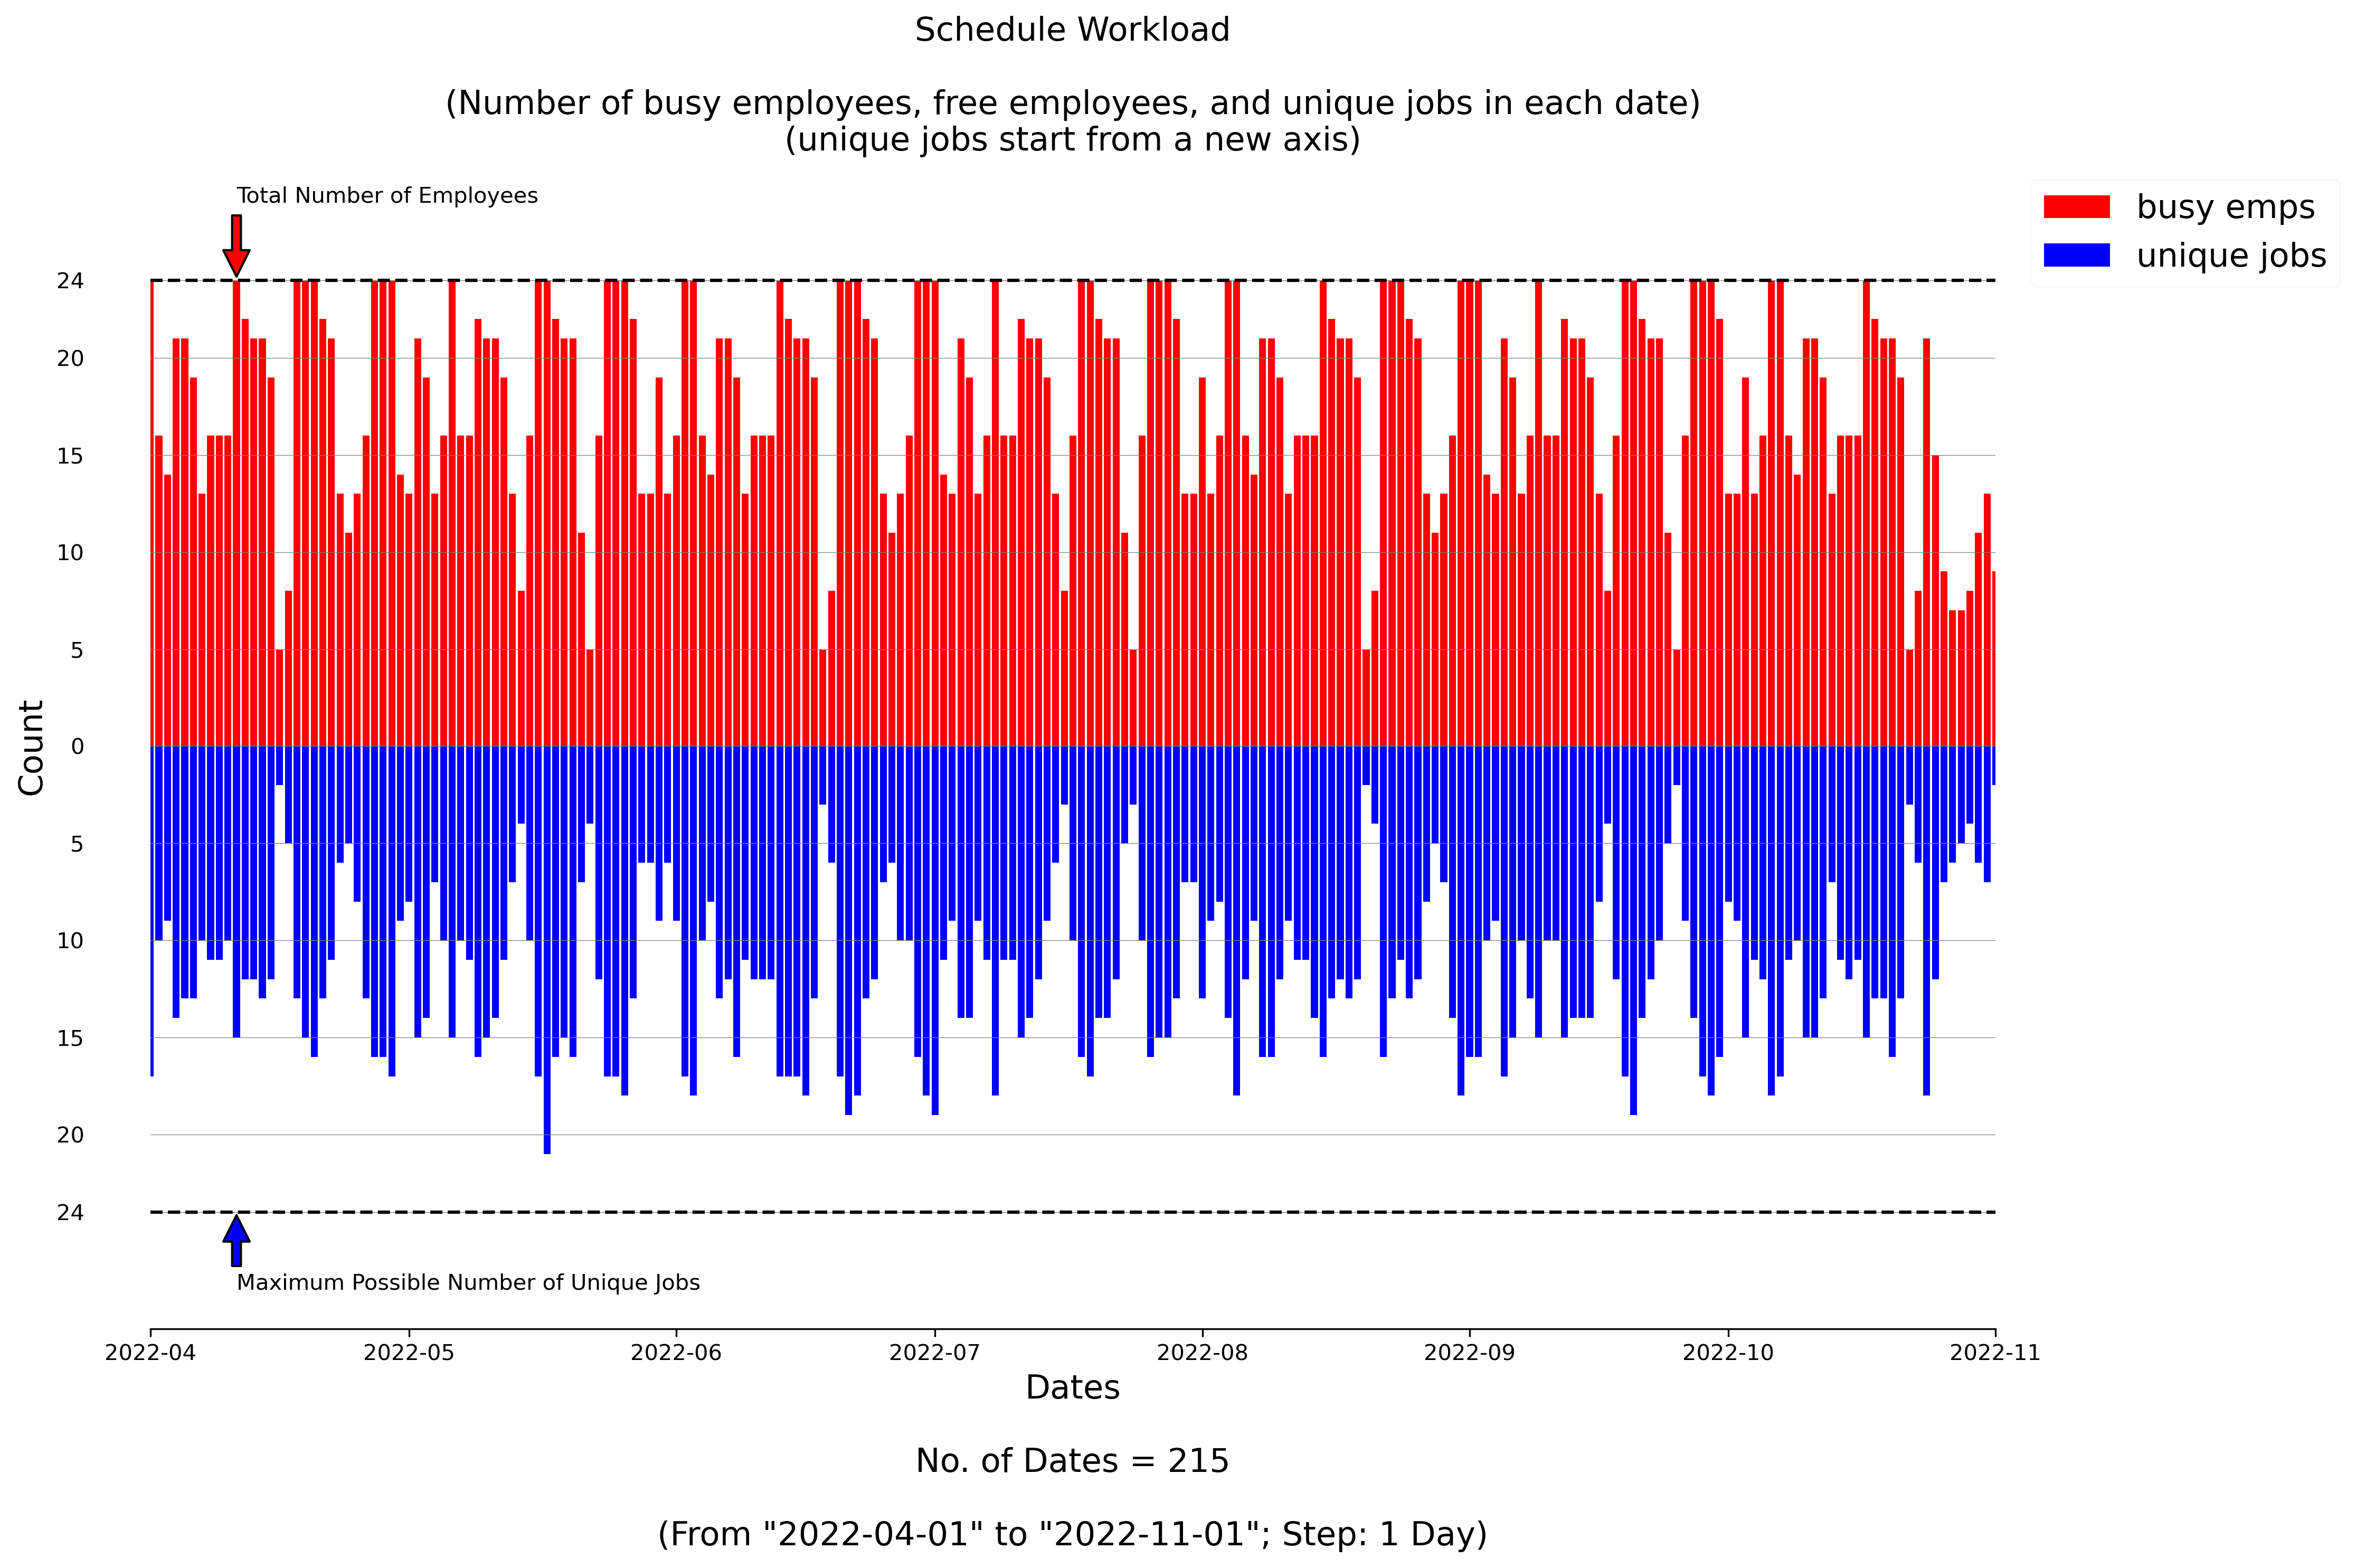

In [7]:
# %matplotlib notebook
# %matplotlib inline

def days(days):
    return datetime.timedelta(days=days)

import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(figsize=(15, 10), dpi=300)

dates = df_calend["date"]
date_len = len(dates)

busy = df_calend["busy_employees"]
free = df_calend["free_employees"]
unique = df_calend["unique_jobs"]

for i in range(0,len(df_calend.index)):
    ax1.bar(dates[i], busy[i], color="r", label="busy" if i == 0 else "")
    ax1.bar(dates[i], -unique[i], color="b", label="unique" if i == 0 else "")
#------------------------------------------------------------------------
ax1.set(  xlim = (dates[0]-days(0), dates.iloc[-1]+days(0)),  ylim = (-30, 30)  )
ax1.set_yticks([-24] + np.arange(-20,21, 5).tolist() + [24], major=True)
ax1.grid(which='major', linestyle='-', linewidth='0.3', color='gray', axis='y')
ticks = ax1.get_yticks(); ax1.set_yticklabels([abs(tick) for tick in ticks]) 
#------------------------------------------------------------------------
ax1.set_xlabel(f"Dates\n\nNo. of Dates = {date_len}\n\n(From \"2022-04-01\" to \"2022-11-01\"; Step: 1 Day)",fontsize=15)
ax1.set_ylabel("Count", fontsize=15)
ax1.set_title("Schedule Workload\n\n(Number of busy employees, free employees, and unique jobs in each date)\n(unique jobs start from a new axis)", fontsize=15)
fig.tight_layout()
ax1.legend(["busy emps", "unique jobs"], loc = "upper left", \
    framealpha=0.1, bbox_to_anchor=(1.01, 1), fontsize=15)
#------------------------------------------------------------------------
# horizontal lines at y=+-24
color = "black"
ax1.axhline(y=+24, color=color, linestyle='--')
ax1.annotate('Total Number of Employees', xy=(dates.iloc[0]+days(10), +24), xytext=(dates.iloc[0]+days(10), +28), 
             arrowprops=dict(facecolor="red", shrink=0.05))

ax1.axhline(y=-24, color=color, linestyle='--')
ax1.annotate('Maximum Possible Number of Unique Jobs', xy=(dates.iloc[0]+days(10), -24), xytext=(dates.iloc[0]+days(10), -28), 
             arrowprops=dict(facecolor="blue", shrink=0.05))
#------------------------------------------------------------------------
ax1.spines[['left', 'right', 'top']].set_visible(False)
ax1.tick_params(axis='y', which='both', length=0, pad=30)

plt.tight_layout()
# plt.savefig('4_sched.png', facecolor='w', dpi=1000)
plt.show()